In [1]:
# chap4.py
import pandas as pd
import numpy as np
import qrpm_funcs as qf
import matplotlib.pyplot as plt
# Get 3 currencies until the end of
# previous year. Form sample covariance matrix
# and do simple efficient frontier calculations

lastday = qf.LastYearEnd()
# Swiss franc, pound sterling, Japanese Yen
seriesnames = ['DEXSZUS', 'DEXUSUK', 'DEXJPUS']
cdates, ratematrix = qf.GetFREDMatrix(seriesnames, enddate=lastday)
multipliers = [-1, 1, -1]
lgdates, difflgs = qf.levels_to_log_returns(cdates, ratematrix, multipliers)

In [2]:
ind = lgdates.index("2020-12-31")
train_set = difflgs[:ind + 1]
test_set = difflgs[ind + 1:]

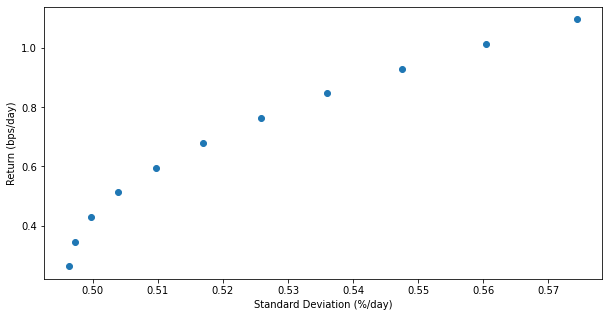

In [8]:
ret = 100 * np.array(train_set)
C = np.cov(ret.T)
C_inv = np.linalg.inv(C)
m_t = np.mean(ret,axis = 0).reshape(1,3)*100
mu_list = []
std_list = []
u = np.ones((3,1))
a = (((u.T@C_inv@u)*(m_t@C_inv@m_t.T) - (u.T@C_inv@m_t.T)**2)/(u.T@C_inv@u))[0][0]
b = (u.T@C_inv@m_t.T/(u.T@C_inv@u))[0][0]
c = (1/(u.T@C_inv@u))[0][0]
omega_list = []
for i in range(11):
    lam = i*0.01
    mu_list.append(lam*a+b)
    std_list.append(np.sqrt(lam*lam*a+c))
    omega_list.append(lam*(np.identity(3)-C_inv@u@u.T*c)@C_inv@m_t.T + C_inv@u*c)

plt.figure(figsize=(10, 5))
plt.scatter(std_list,mu_list)
plt.xlabel("Standard Deviation (%/day)")
plt.ylabel("Return (bps/day)")
plt.show()

In [9]:
ret_test = 100*np.array(test_set)
C_test = np.cov(ret_test.T)
var_test = []
for i in range(11):
    omega = omega_list[i]
    var = (omega.T@C_test@omega)[0][0]
    var_test.append(var)
print("Variances of portf in the test set: \n", var_test)
temp = enumerate(var_test)
temp = sorted(temp,key=lambda x:x[1])
temp

Variances of portf in the test set: 
 [0.09150359805358824, 0.08925399461055813, 0.08780360688917921, 0.08715243488945146, 0.08730047861137491, 0.08824773805494955, 0.08999421322017537, 0.09253990410705239, 0.0958848107155806, 0.10002893304575998, 0.10497227109759055]


[(3, 0.08715243488945146),
 (4, 0.08730047861137491),
 (2, 0.08780360688917921),
 (5, 0.08824773805494955),
 (1, 0.08925399461055813),
 (6, 0.08999421322017537),
 (0, 0.09150359805358824),
 (7, 0.09253990410705239),
 (8, 0.0958848107155806),
 (9, 0.10002893304575998),
 (10, 0.10497227109759055)]